## Importing libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Importing data and scaling

In [19]:
dataset= pd.read_csv("creditcard.csv")
x = dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
sc =MinMaxScaler()
sc.fit_transform(x)
# the code below tells the number of fraud transactions as 1 and number of normal transactions as 0 and displays the value counts
# df = pd.DataFrame(y)
# df.value_counts()

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

### Using the minisom (self organising map implementation using numpy )

In [22]:

from minisom import MiniSom
#here input length is number of columns , x and y are the dimensions of our SOM
som=MiniSom(x=15,y=15,input_len=30,sigma=1,learning_rate=0.5)
#initializing neurons with random weights and BMU performing weight changing over given number of iterations 
som.random_weights_init(x)
som.train_random(data=x,num_iteration=100)

## Plotting 

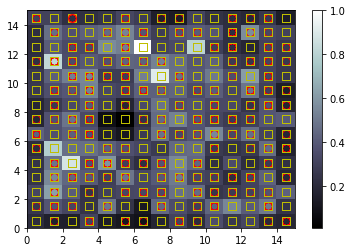

In [23]:
from pylab import bone,pcolor,colorbar,plot,show
bone()# for bone /window of graph
pcolor(som.distance_map().T)#pcolor gives the plot the color and .t gives transpose
colorbar()# indicates the distance corresponding to color 
markers= ['s','o']
colors=['y','r']
#yellow square for normal and red circles for fraudulent transactions
#actual plotting and making a for loop to cover all of the dataset after enumrating over dataset
for i,z in enumerate(x):
    w=som.winner(z)#winning node
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],markeredgecolor=colors[y[i]],markersize=8,markeredgewidth=1,markerfacecolor='None')
show()